# CS 675 Final Project | Professor Buchi Okli

# Sentiment Analysis with IMDb Movie Reviews

In [36]:
import nltk
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix

### Load movie reviews dataset

In [37]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [38]:
print("Number of reviews:", len(documents))

Number of reviews: 2000


In [39]:
print(documents[0])

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'b

### Shuffle the documents

In [40]:
documents = shuffle(documents)

In [41]:
print(documents[0])

(['writer', '/', 'director', 'lawrence', 'kasdan', 'had', 'a', 'hand', 'in', 'penning', 'some', 'of', 'the', 'biggest', 'film', 'successes', 'of', 'the', '1980s', '.', 'yes', ',', 'that', "'", 's', 'right', ',', 'he', 'co', '-', 'wrote', 'raiders', 'of', 'the', 'lost', 'ark', '(', '9', '/', '10', ')', ',', 'the', 'empire', 'strikes', 'back', '(', '8', '.', '5', '/', '10', ')', 'and', 'return', 'of', 'the', 'jedi', '(', '8', '/', '10', ')', '.', 'now', 'with', 'this', 'film', ',', 'it', 'looks', 'as', 'though', 'he', 'has', 'decided', 'to', 'test', 'his', 'skills', 'at', 'mediocre', 'screenwriting', 'and', 'bland', 'directing', '.', 'and', 'guess', 'what', '?', 'he', 'succeeds', 'once', 'again', '!', 'plot', ':', 'a', 'man', 'with', 'a', 'shady', 'and', 'regrettable', 'past', 'decides', 'to', 'run', 'away', 'and', 'into', 'a', 'small', 'american', 'town', ',', 'where', 'he', 'pretends', 'to', 'be', 'a', 'licensed', 'psychologist', 'to', 'an', 'open', '-', 'armed', 'swarm', 'of', 'people

### Preprocess the text data

In [42]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = [word.lower() for word in text if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [43]:
featuresets = [(preprocess_text(words), category) for words, category in documents]

In [44]:
print(featuresets[0])

('writer director lawrence kasdan hand penning biggest film success yes right co wrote raider lost ark empire strike back return jedi film look though decided test skill mediocre screenwriting bland directing guess succeeds plot man shady regrettable past decides run away small american town pretend licensed psychologist open armed swarm people problem long befriends small town billionaire folk become suspicious fall one patient critique film comedy drama say right front look trailer would think film secures base humor unfortunately u serious film seriously flawed ask digress offer couple witty quip keep awake overall sits review movie suck slow boring starred uninteresting protagonist unbelievable past included extremely dull patient whose problem left indifferent best pissed worst certified many predictable ending idea lawrence kasdan trying accomplish picture whatever missed anyone without name could never made film extremely generic puff piece good day might described predictably d

### Split the dataset into training and testing sets

In [45]:
X, y = zip(*featuresets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 1600
Testing set size: 400


In [46]:
print("Sample review in training set:")
print(X_train[0], y_train[0])
print("Sample review in testing set:")
print(X_test[0], y_test[0])

Sample review in training set:
hearing review woody allen upteenth movie history celebrity range terribly boring heart lept opening image film closely resembled manhattan personal favorite personal favorite director time woody allen film almost never rely visual flair textual flair one film closely resembles one time two entity fit hand hand manhattan really one best looking film ever seen beautiful black white photography city best area etc fan help feel visibly moved film open usual credit plain white font black background old ironic standard playing soundtrack screen fill gorgeous dull gray sky word help spelled airplane beethoven blast soundtrack city seems stop take notice moment rather lovely look cut film crew shooting film hilariously banal key moment film lead actress film melanie griffith looking buxom beautiful ever realize something wrong life whatever terribly stale scene woody allen film great opening shot without heart sank soon got used fact new film going great past wo

### Vectorize the text data

In [47]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [48]:
print("Number of features:", len(vectorizer.get_feature_names_out()))

Number of features: 31561


### Train a Naive Bayes classifier

In [49]:
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [50]:
y_pred = classifier.predict(X_test_counts)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8025
Classification Report:
              precision    recall  f1-score   support

         neg       0.77      0.84      0.80       193
         pos       0.84      0.76      0.80       207

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[163  30]
 [ 49 158]]


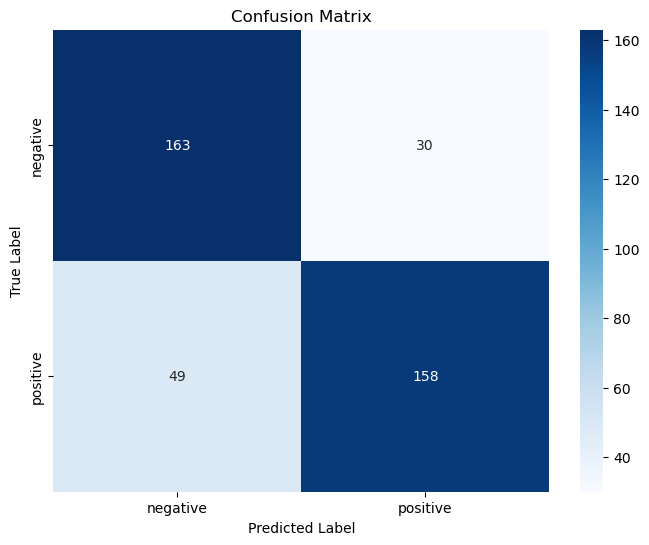

In [54]:
import seaborn as sns

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix provides a summary of the performance of a classification model. It is particularly useful for understanding how well the model is classifying instances into different classes.

In the context of sentiment analysis, where we have binary classification (positive and negative sentiments), the confusion matrix provides the following information:

True Positives (TP): The number of positive instances that were correctly classified as positive. In sentiment analysis, this would be the number of positive reviews that were correctly classified as positive.

True Negatives (TN): The number of negative instances that were correctly classified as negative. In sentiment analysis, this would be the number of negative reviews that were correctly classified as negative.

False Positives (FP): The number of negative instances that were incorrectly classified as positive. In sentiment analysis, this would be the number of negative reviews that were incorrectly classified as positive.

False Negatives (FN): The number of positive instances that were incorrectly classified as negative. In sentiment analysis, this would be the number of positive reviews that were incorrectly classified as negative.

    True Positives (TP): 158
    True Negatives (TN): 163
    False Positives (FP): 30
    False Negatives (FN): 49

This means:

    163 negative reviews were correctly classified as negative (True Negatives).
    158 positive reviews were correctly classified as positive (True Positives).
    30 negative reviews were incorrectly classified as positive (False Positives).
    49 positive reviews were incorrectly classified as negative (False Negatives).

In [55]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8025
